In [17]:
import numpy as np
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt
import mplhep as hep

hep.style.use("ATLAS")

In [18]:
# prob 2

BINS = 50
RNG = np.random.default_rng(20240229)
S1 = RNG.uniform(-1, 1, int(1e8))
SAMPLE = int(1e6)  # number of samples
ANALYTICAL_SAMPLE = int(1e3)

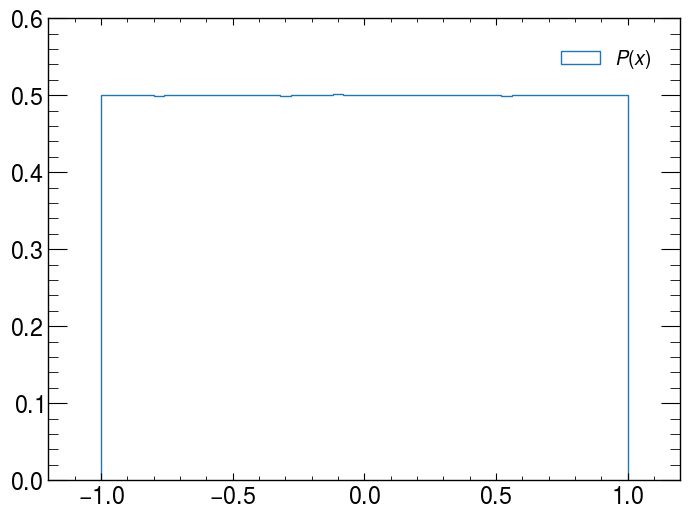

In [19]:
plt.hist(
    S1, bins=BINS, histtype="step", label=r"$P(x)$", density=True, color="tab:blue"
)
plt.xlim([-1.2, 1.2])
plt.legend()

In [20]:
def f(x, sigma, mu=0):
    return np.exp(-0.5 * np.square((x - mu) / sigma)) / (sigma * np.sqrt(2 * np.pi))


x2_1 = np.linspace(-2, 0, ANALYTICAL_SAMPLE)


def f2_1(x=x2_1):
    return 0.25 * (2 + x)


x2_2 = np.linspace(0, 2, ANALYTICAL_SAMPLE)


def f2_2(x=x2_2):
    return 0.25 * (2 - x)


x2 = np.concatenate((x2_1, x2_2))
prob21 = np.concatenate((f2_1(), f2_2()))


x3_1 = np.linspace(1, 3, ANALYTICAL_SAMPLE)


def f3_1(x=x3_1):
    return 0.125 * ((6 - 2 * x) - 0.5 * (-np.square(x) + 2 * x + 3))


x3_23 = np.linspace(-1, 1, ANALYTICAL_SAMPLE)


def f3_2(x=x3_23):
    return 0.125 * ((2 + 2 * x) - 0.5 * (np.square(x) + 2 * x + 1))


def f3_3(x=x3_23):
    return 0.125 * ((2 - 2 * x) + 0.5 * (-np.square(x) + 2 * x - 1))


x3_4 = np.linspace(-3, -1, ANALYTICAL_SAMPLE)


def f3_4(x=x3_4):
    return 0.125 * ((6 + 2 * x) + 0.5 * (np.square(x) + 2 * x - 3))


x3 = np.concatenate((x3_4, x3_23, x3_1))
prob31 = np.concatenate((f3_4(), f3_3() + f3_2(), f3_1()))


def plot(num, analytical=0, analytical_x=0, dist=S1):
    data = RNG.choice(dist, SAMPLE)
    for _ in range(num - 1):
        data += RNG.choice(dist, SAMPLE)

    sigma = np.sqrt(num / 3)  # if cov is 0.
    print(f"Sampling standard deviation ({num}): ", np.std(data))
    xx = np.linspace(-num, num, int(1e6))
    fig = plt.figure(figsize=(8, 6), dpi=100)
    plt.plot(xx, f(xx, sigma), label="Gaussian", color="blue")
    if type(analytical) != int:
        plt.plot(analytical_x, analytical, "--", label="Analytical", color="green")
    bins, _, _ = plt.hist(
        data, bins=BINS, histtype="step", label=r"$P(x)$", density=True, color="red"
    )
    rmse = mean_squared_error(f(np.linspace(-num, num, BINS), sigma), bins, squared=False)
    plt.plot(0, 0, ".", label=f"10*RMSE: {10*rmse:.3f}", color="white")
    plt.xlim([-num, num])
    plt.legend()
    plt.title(
        f"Problem 2-{int(num)} with "
        + r"$\sigma = $ "
        + f"{sigma:.2f}, "
        + r"$\mu = 0$"
    )
    plt.show()
    plt.close()

Sampling standard deviation (1):  0.5772287360014084


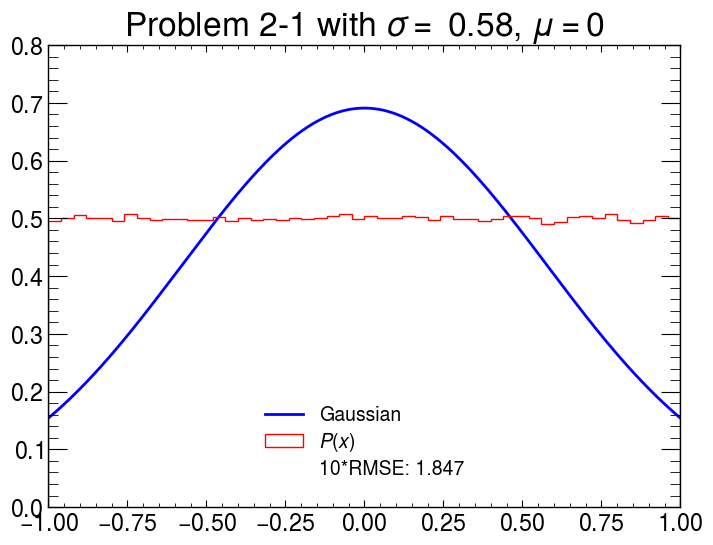

Sampling standard deviation (2):  0.8163214470918106


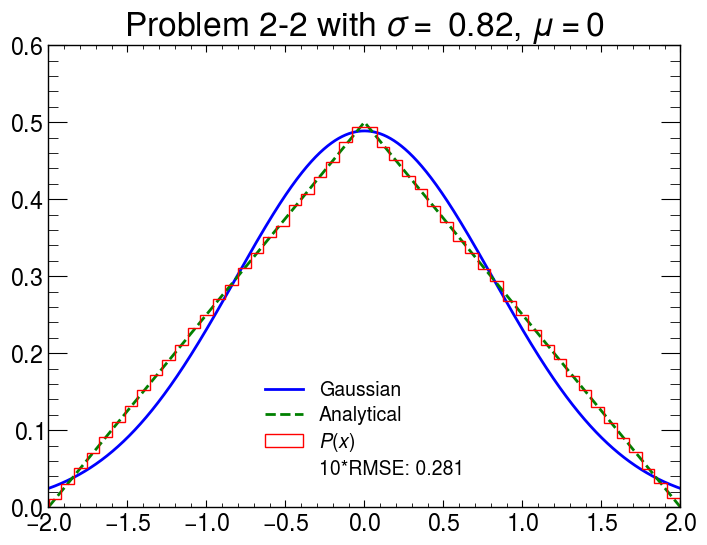

Sampling standard deviation (3):  0.9997153252510305


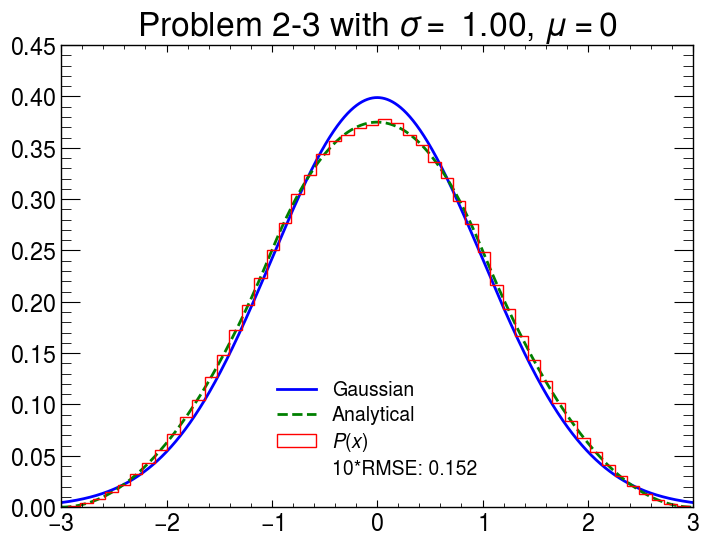

Sampling standard deviation (100):  5.7782627571315786


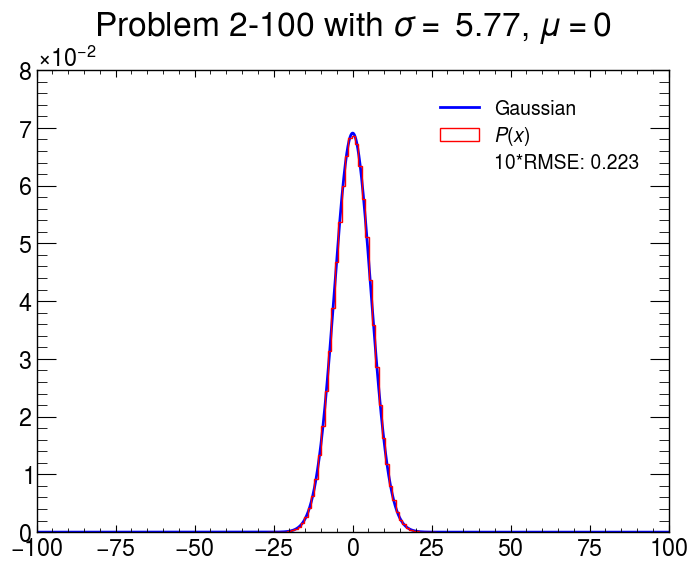

In [21]:
plot(1)
plot(2, prob21, x2)
plot(3, prob31, x3)
plot(100)

In [23]:
# prob 3-3: Gauss
BINS = 100
num = int(1e4)

gauss = np.random.normal(0, 1, int(1e6))
sample = RNG.choice(gauss, int(1e3))
for _ in range(num):
    RNG.shuffle(gauss)
    sample += RNG.choice(gauss, int(1e3))

In [33]:
print(f"Population variance of Cauchy distribution: {np.std(gauss) ** 2:.2f}")

Population variance of Cauchy distribution: 1.00


Sampling standard deviation (10000):  100.27311144744529


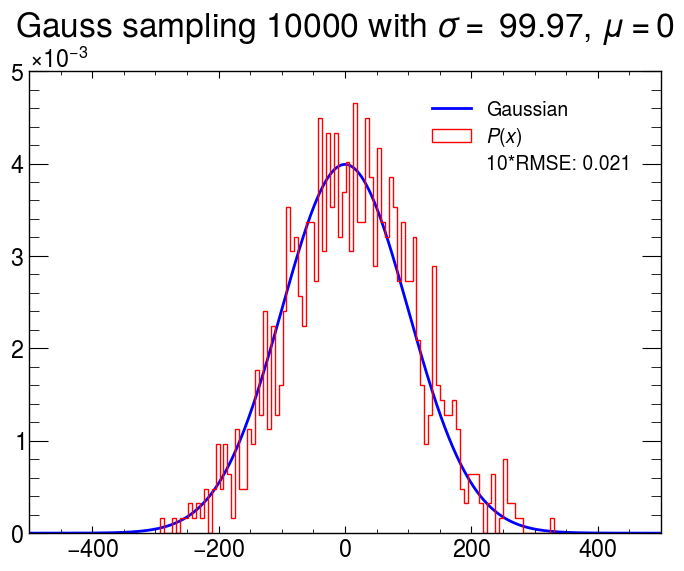

In [25]:
sigma = np.sqrt(num * np.std(gauss) ** 2)  # if cov is 0.
print(f"Sampling standard deviation ({num}): ", np.std(sample))
xx = np.linspace(-num, num, int(1e6))
fig = plt.figure(figsize=(8, 6), dpi=100)
plt.plot(xx, f(xx, sigma), label="Gaussian", color="blue")
bins, _, _ = plt.hist(
    sample, bins=BINS, histtype="step", label=r"$P(x)$", density=True, color="red"
)
rmse = mean_squared_error(f(np.linspace(-num, num, BINS), sigma), bins, squared=False)
plt.plot(0, 0, ".", label=f"10*RMSE: {10*rmse:.3f}", color="white")
plt.xlim([-500, 500])
plt.legend()
plt.title(
    f"Gauss sampling {int(num)} with "
    + r"$\sigma = $ "
    + f"{sigma:.2f}, "
    + r"$\mu = 0$"
)
plt.show()
plt.close()

In [26]:
# prob 3-3: Cauchy

cauchy = np.random.standard_cauchy(int(1e6))
cauchy = cauchy[(cauchy > -25) & (cauchy < 25)]  # truncate distribution so it plots well
sample = RNG.choice(cauchy, int(1e3))
for _ in range(num):
    RNG.shuffle(cauchy)
    sample += RNG.choice(cauchy, int(1e3))

In [32]:
print(f"Population variance of Cauchy distribution: {np.std(cauchy) ** 2:.2f}")

Population variance of Cauchy distribution: 15.33


Sampling standard deviation (10000):  373.5352462658168


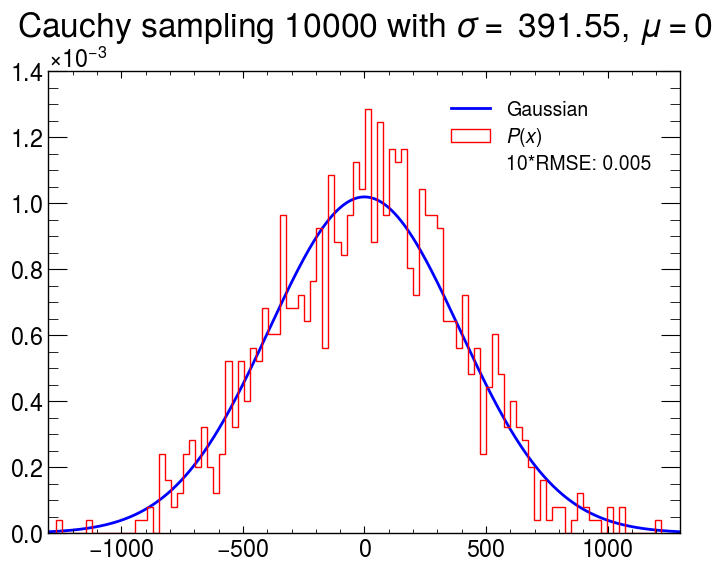

In [27]:
sigma = np.sqrt(num * np.std(cauchy) ** 2)  # if cov is 0.
print(f"Sampling standard deviation ({num}): ", np.std(sample))
xx = np.linspace(-num, num, int(1e6))
fig = plt.figure(figsize=(8, 6), dpi=100)
plt.plot(xx, f(xx, sigma), label="Gaussian", color="blue")
bins, _, _ = plt.hist(
    sample, bins=BINS, histtype="step", label=r"$P(x)$", density=True, color="red"
)
rmse = mean_squared_error(f(np.linspace(-num, num, BINS), sigma), bins, squared=False)
plt.plot(0, 0, ".", label=f"10*RMSE: {10*rmse:.3f}", color="white")
plt.xlim([-1300, 1300])
plt.legend()
plt.title(
    f"Cauchy sampling {int(num)} with "
    + r"$\sigma = $ "
    + f"{sigma:.2f}, "
    + r"$\mu = 0$"
)
plt.show()
plt.close()